In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import copy
import numpy as np

In [3]:
totals = []
allCountries = []

for year in range(2014,2023):
    for month in range(1,13):
        name ="%s:%s" % (year, month)
        fileName = "Data/referrer-monthly-countries/%s/%s-%s.csv" % (year, year, month)
        try:
            with open(fileName) as file:
                i = 0
                xIndex = (year-2014)*12 + month-1
                for line in file.readlines():
                    if i == 0:
                        i = 1
                        continue

                    line = line.strip().split(',')
                    val = int(line[3])
                    if line[2] in allCountries:
                        totals[allCountries.index(line[2])] += val
                    else:
                        allCountries.append(line[2])
                        totals.append(val)
        except FileNotFoundError:
            continue

countries = allCountries

In [4]:
temp = copy.deepcopy(totals)
temp.sort(reverse=True)
temp = temp[:10]
countries = []

for v in temp:
    countries.append(allCountries[totals.index(v)])

In [69]:
maxValues = [1 for j in range(0,9*12-2)]
sumValues = [1 for j in range(0,9*12-2)]
occurences = []
xData = []
countryLabels = []
months = [
    'jan',
    'feb',
    'mar',
    'apr',
    'may',
    'jun',
    'jul',
    'aug',
    'sep',
    'oct',
    'nov',
    'dec'
]

for year in range(2014,2023):
    for month in range(1,13):
        fileName = "Data/referrer-monthly-countries/%s/%s-%s.csv" % (year, year, month)
        try:
            with open(fileName) as file:
                
                if len(xData) % 12 == 0:
                    name ="%s - %s" % (year, months[month-1])
                    name = str(year)
                else:
                    name ="%s" % (months[month-1])
                    name =''
                
                xData.append(name)

                i = 0
                xIndex = (year-2014)*12 + month-1
                for line in file.readlines():
                    line = line.strip().split(',')

                    if i == 0 or line[2] not in countries:
                        i = 1
                        continue
                    
                    if line[2] not in countryLabels:
                        countryLabels.append(line[2])
                        occurences.append([0 for j in range(0,9*12-2)])
                    
                    val = int(line[3])
                    yIndex = countryLabels.index(line[2])
                    occurences[yIndex][xIndex] = val
                    sumValues[xIndex] += val
                    if val > maxValues[xIndex]:
                        maxValues[xIndex] = val
        except FileNotFoundError:
            continue

In [6]:
# Normalization step
for index, o in enumerate(occurences):
    for k, v in enumerate(o):
        o[k] = v/sumValues[k]

10

Text(0.5, 0, 'Month')

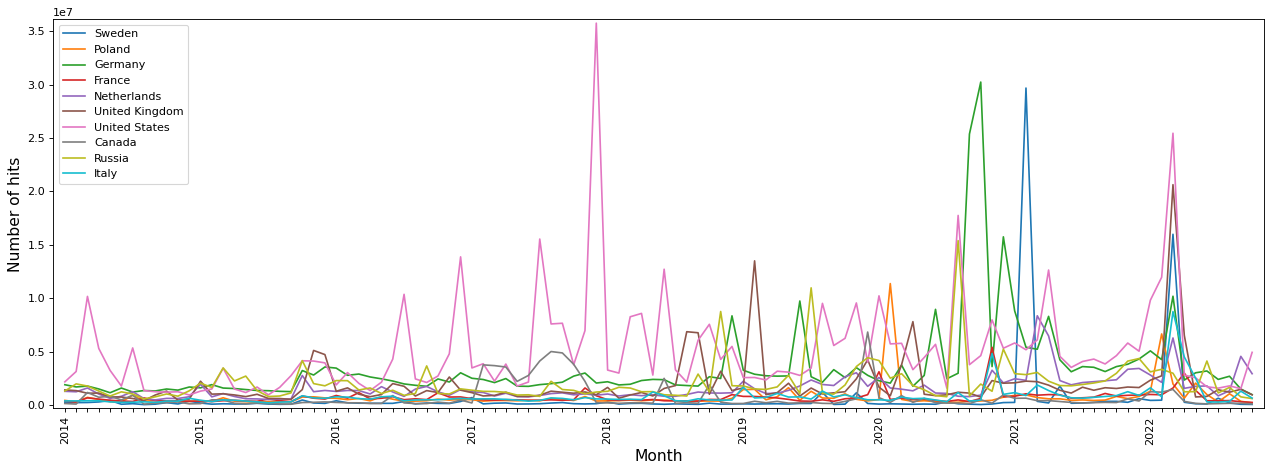

In [70]:
npOc = np.asarray(occurences)
figure(figsize=(16, 6), dpi=80, layout='tight')

plt.margins(0.01)
plt.xticks(ticks=[j for j in range(0,106)], labels=xData, rotation=90)
lineObjects = plt.plot(npOc.T)
plt.ticklabel_format(axis='y')
plt.legend(lineObjects, countryLabels)
plt.ylabel("Number of hits", fontsize=14)
plt.xlabel("Month", fontsize=14)
# plt.title("Number of hits in a given month,\nfor 10 most active countries.")

In [8]:
import pandas as pd

In [9]:
us_counts = pd.read_csv('Data/Counts_per_day/us_counts.csv')
us_counts = us_counts.drop('id', axis=1)
us_counts.head()

,city,date,count
0,NaN,1,10193
1,NaN,2,7015
2,NaN,3,5711
3,NaN,4,8274
4,NaN,5,6789


In [14]:
uk_counts = pd.read_csv('Data/Counts_per_day/uk_counts.csv')
uk_counts = uk_counts.drop('id', axis=1)

In [76]:
uk_counts2 = pd.read_csv('Data/Counts_per_day/uk_counts_feb22.csv')
uk_counts2 = uk_counts2.drop('id', axis=1)

,date,country_name,count,host
0,1,United Kingdom,1,google.com
1,1,United Kingdom,1,baidu.com
2,1,United Kingdom,1,search.yahoo.com
3,1,United Kingdom,40,google.com
4,1,United Kingdom,2,duckduckgo.com


In [15]:
de_counts = pd.read_csv("Data/Counts_per_day/de_counts.csv")
de_counts = de_counts.drop('id', axis=1)
de_sep_counts = pd.read_csv("Data/Counts_per_day/de_counts_sep.csv")
de_sep_counts = de_sep_counts.drop('id', axis=1)

In [17]:
city_counts_us = us_counts.groupby('city')['count'].sum()
# city_counts_us.to_csv("Data/Counts_per_day_us/city_counts_us.csv")

In [18]:
date_counts_us = us_counts.groupby('date')['count'].sum()
date_counts_uk = uk_counts.groupby('date')['count'].sum()
date_counts_de = de_counts.groupby('date')['count'].sum()
date_counts_de_sep = de_sep_counts.groupby('date')['count'].sum()
date_counts_uk_feb22 = uk_counts2.groupby('date')['count'].sum()

date
1       34977
2      172606
3     1197571
4      708444
5     3732162
6      797193
7     2412910
8       22134
9      380092
10    1231760
11     496474
12    1292223
13      59599
14      47168
15      15552
16      31831
17      50892
18      18632
19      29282
20     112932
21     102500
22      98615
23     110526
24      85601
25      54594
26     102652
27      83151
28      31897
Name: count, dtype: int64

In [27]:
swe_counts = pd.read_csv('Data/Counts_per_day/sweden_counts.csv')
swe_counts = swe_counts.drop('id', axis=1)
swe_counts = swe_counts.groupby('date')['count'].sum()
swe_counts.head()

date
1     247033
2     471336
3    1153451
4    3695151
5    4496077
Name: count, dtype: int64

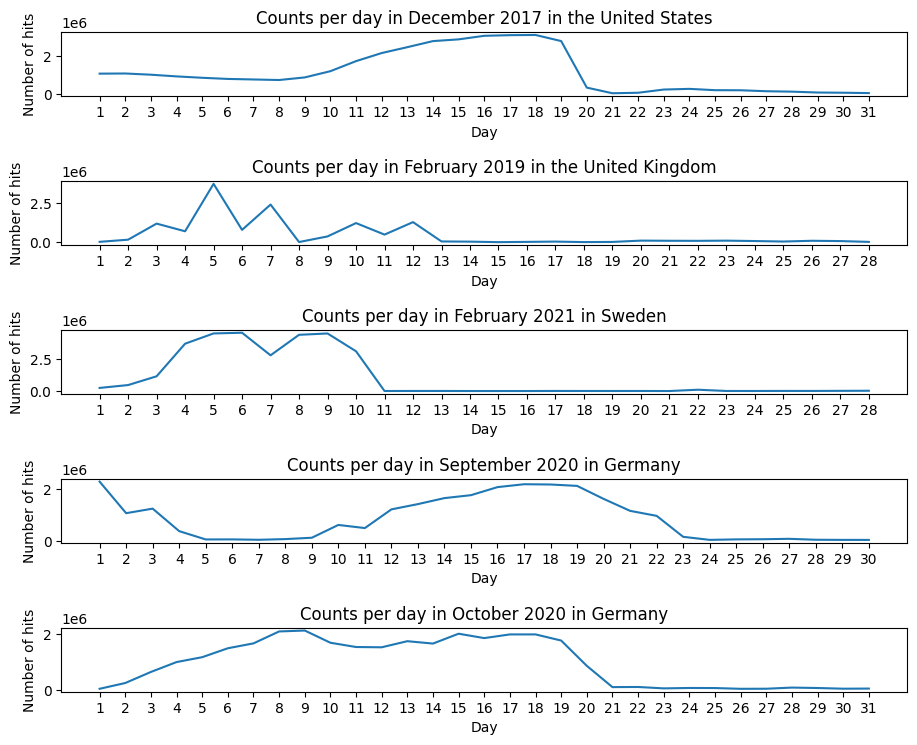

In [71]:
fig, ax = plt.subplots(5, 1)
x31 = [i for i in range(1,32)]
x30 = [i for i in range(1,31)]
x28 = [i for i in range(1,29)]

fig.set_figwidth(10)
fig.set_figheight(8)
fig.tight_layout(pad=4)

ax[0].plot(date_counts_us)
ax[0].set_title("Counts per day in December 2017 in the United States")
ax[0].set_xlabel("Day")
ax[0].set_ylabel("Number of hits")
ax[0].set_xticks(x31)

ax[1].plot(date_counts_uk)
ax[1].set_title("Counts per day in February 2019 in the United Kingdom")
ax[1].set_xlabel("Day")
ax[1].set_ylabel("Number of hits")
ax[1].set_xticks(x28)

ax[2].plot(swe_counts)
ax[2].set_title("Counts per day in February 2021 in Sweden")
ax[2].set_xlabel("Day")
ax[2].set_ylabel("Number of hits")
ax[2].set_xticks(x28)

ax[3].plot(date_counts_de_sep)
ax[3].set_title("Counts per day in September 2020 in Germany")
ax[3].set_xlabel("Day")
ax[3].set_ylabel("Number of hits")
ax[3].set_xticks(x30)

ax[4].plot(date_counts_de)
ax[4].set_title("Counts per day in October 2020 in Germany")
ax[4].set_xlabel("Day")
ax[4].set_ylabel("Number of hits")
ax[4].set_xticks(x31)
